# ENGR 1110 Group Project
*   Jackson Darby - Product Owner
*   Mason Boulier - Scrum Master
*   Lis Castillo  - Developer
*   Luke Filasek  - Developer
*   Chingis Badanov  - Developer











#Introduction

# Oil Consumption


Currently, the world has a large reliance on natural resources like coal and oil. According to [Penn State](https://courses.ems.psu.edu/earth104/node/1298), we have less than 50 years of proven oil reserves left. With our current usage rate, this poses a huge potential problem for humanity since we depend on it for our power. This over-reliance on oil could eventually lead to a scramble to keep the world powered.

This project analyzes the depleting oil reserves in the world. It uses plotting through python to show predictions of when oil reserves will be emptied.


---

This dataset has been adopted from [https://www.kaggle.com/datasets/muhammadroshaanriaz/oil-reserves-and-consumption-from-1995-to-2022/data](https://www.kaggle.com/datasets/muhammadroshaanriaz/oil-reserves-and-consumption-from-1995-to-2022/data)

1. Use gspread to import the data from a Google Sheet
2. Import Matplot in order to graph oil consumption and
3. import Pandas in order to organize the dataset.
4. Finally create the graph using Matplot and the dataset we imported from the file.

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
world_oil_consumption_spreadsheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1w7_-GhI3YXsSLV3heEm6KQ3ba3P72KYD_n1hxWMnNmg/edit?usp=sharing')
oil_ws = world_oil_consumption_spreadsheet.sheet1

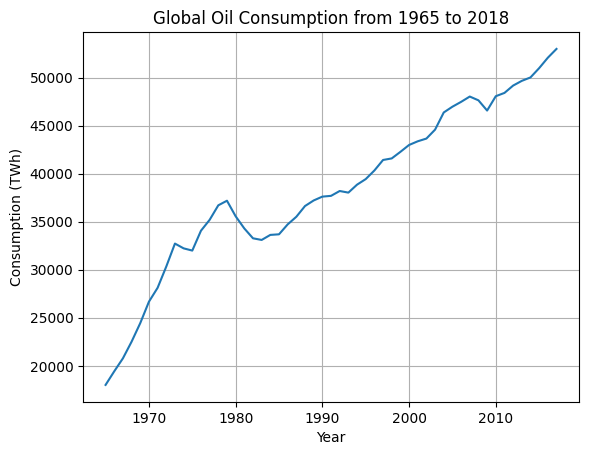

In [ ]:
# Mason Boulier
# This code outputs a graph of our growing global oil consumption.
# Oil is a finite resource and the world needs to pivot to using more renewable resources.

# Import plot library
import matplotlib.pyplot as plt
# Import data management library
import pandas as pd

# Read CSV data file
cdf = pd.DataFrame(oil_ws.get_all_records())

# Create range of years that we will use
years = range(1965, 2018)
# Create empty array
consumption = []

# For each year in years array, append global consumption for that year.
for year in years:
    # Global usage in TWh (One trillion watt-hours)
    consumption.append(cdf.iloc[-1][str(year)])

# Plot consumption data
plt.plot(years, consumption)

# Create title and labels
plt.title("Global Oil Consumption from 1965 to 2018")
plt.xlabel('Year')
plt.ylabel("Consumption (TWh)")
plt.grid(True)

# Show the plot
plt.show()

## Graph Analysis:
This graph shows that oil use has grown dramatically over 40 years from 1970 to 2010. In the 1960s, we consumed less than 20,000 terawatts worth of oil a year. However, as the years go on we grow more reliant on oil. Until 2010, where the oil consumption more than doubles to over 50,000 terawatts. This trend will only continue consuming more oil every year and since oil is a finite resource this is sure to be a problem in the near future.

#Depleting Oil Reserves

This dataset has been adopted from [https://ourworldindata.org/grapher/years-of-fossil-fuel-reserves-left?tab=line&time=earliest..2020](https://ourworldindata.org/grapher/years-of-fossil-fuel-reserves-left?tab=line&time=earliest..2020)

Import the file from a Google spread sheet using gspread

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
spreadsheet = gc.open("Years-of-fossil-fuel-reserves-left")
worksheet = spreadsheet.sheet1

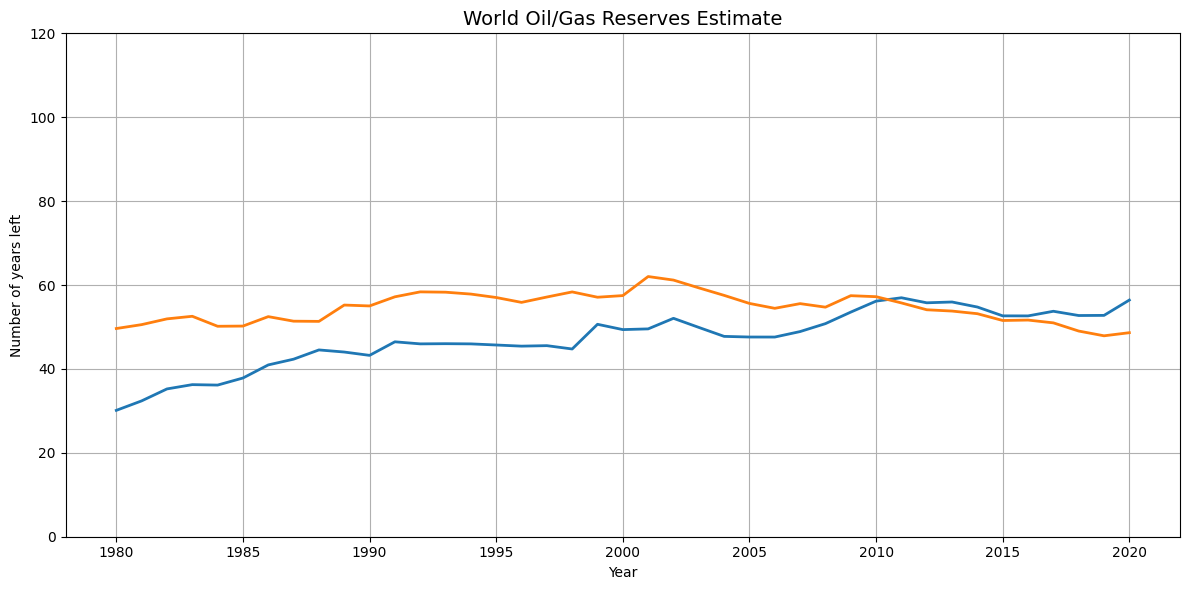

In [ ]:
#Jackson Darby
#This code outputs the estimate of oil reserves over since 1980.
#Import data management library
import pandas as pd
#Import plot library
import matplotlib.pyplot as plt
#Read the file using pandas
df = pd.DataFrame(worksheet.get_all_records())

#Get all the data under entity
countries = ["World"]
#Get the estimates for the world oil from 1980 to 2020
world_oil = (
    df[df["Entity"].isin(countries)]
    .groupby(["Year"])["Oil reserves/production ratio"]
    #Add all the world data together by year
    .sum()
)
#Get the estimates for the world gas from 1980 to 2020
world_gas = (
    df[df["Entity"].isin(countries)]
    .groupby(["Year"])["Gas reserves/production ratio"]
    #Add all the world data together by year
    .sum()
)
#Size the graph 12 by 6
world_oil.plot(figsize=(12,6), linewidth=2)
world_gas.plot(figsize=(12,6), linewidth=2)
#Create title
plt.title("World Oil/Gas Reserves Estimate", fontsize=14)
#Create x-axis label
plt.xlabel("Year")
#Create y-axis label
plt.ylim(0, 120)
plt.ylabel("Number of years left")
#Add the grid to better see where the points on the line are
plt.grid(True)
plt.tight_layout()
#Fianlly show the graph
plt.show()

##Graph Analysis

This graph shows the estimate for when oil and gas will run out. The blue line is oil while the orange one is natural gas. each year has a different estiamte bacause the consumption and production rate for that year changes. Natural gas is currently in a large decline as estimates have it at just 48 years left. And although oil is increasing its estimate it is not likely to stay that way. Easily accessible oil sites are running out. This will lead to oil being less and less economically viable to extract. Therefore, if we do not deal with replacements for oil we will be dealing with either exorbitant prices or corporations unwilling to invest in pricey oil extraction.

# Other Sources for Power Compared with Oil:


## Nuclear:

This dataset has been adopted from [https://www.kaggle.com/datasets/alistairking/nuclear-energy-datasets](https://www.kaggle.com/datasets/alistairking/nuclear-energy-datasets)

Import the file from a Google spread sheet using gspread

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
spreadsheet = gc.open("World_nuclear_energy_generation")
worksheet = spreadsheet.sheet1

Define the heading terms of the dataset such as years and the continents

Finally, graph the dataset using matplot

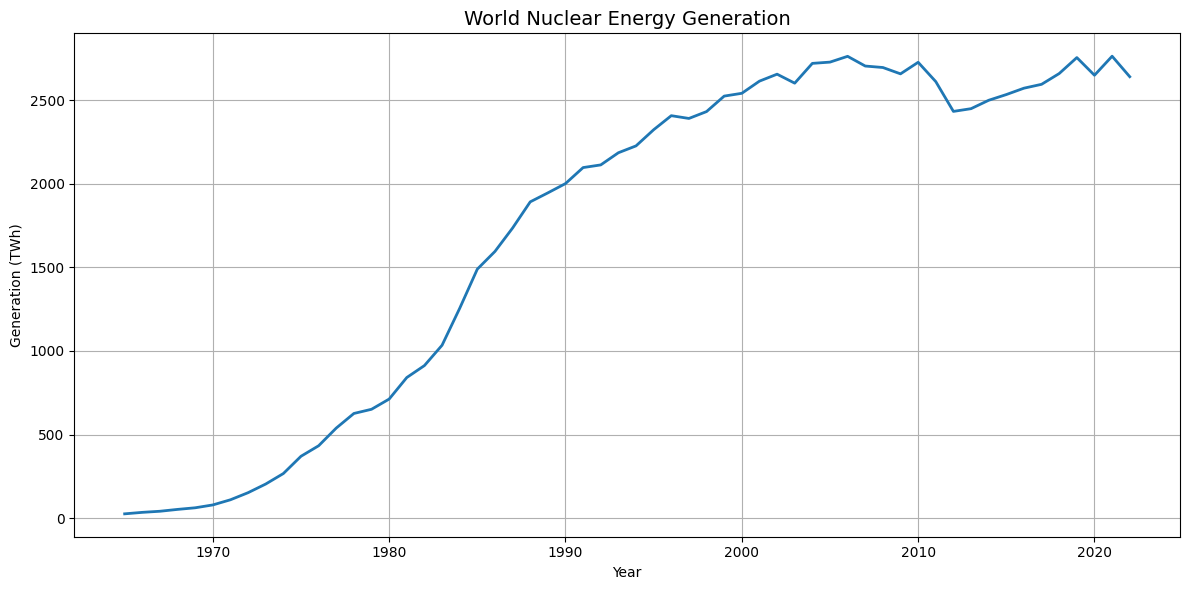

In [ ]:
#Jackson Darby
#This code outputs the total terawatts of energy generated from nuclear power plants across the world since 1965
#Import data management library
import pandas as pd
#Import plot library
import matplotlib.pyplot as plt
#Read the file using pandas
df = pd.DataFrame(worksheet.get_all_records())

#Get all the continents TWh
countries = ["North America", "Asia", "Europe", "South America", "Africa", "Oceania"]
#Get the TWh data only if it is one of the 7 continents above
country_yearly = (
    df[df["Entity"].isin(countries)]
    .groupby(["Year"])["electricity_from_nuclear_twh"]
    #Add all the continents TWh data together so it is the world's total
    .sum()
)
#Size the graph 12 by 6
country_yearly.plot(figsize=(12,6), linewidth=2)
#Create title
plt.title("World Nuclear Energy Generation", fontsize=14)
#Create x-axis label
plt.xlabel("Year")
#Create y-axis label
plt.ylabel("Generation (TWh)")
#Add the grid to better see where the points on the line are
plt.grid(True)
plt.tight_layout()
#Fianlly show the graph
plt.show()

### Graph Analysis:
This shows that although Nuclear energy production is rapidly growing over that last 50 years, it only produces a little over 2500 TWh of energy while so much more oil is being relied upon for energy production.


##Renewables

This dataset has been adopted from [https://www.kaggle.com/datasets/belayethossainds/renewable-energy-world-wide-19652022](https://www.kaggle.com/datasets/belayethossainds/renewable-energy-world-wide-19652022)

Import the file from a Google spread sheet using gspread

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
spreadsheet = gc.open("Modern-renewable-prod")
worksheet = spreadsheet.sheet1

Define the heading terms of the dataset such as years and the continents

Finally, graph the dataset using matplot

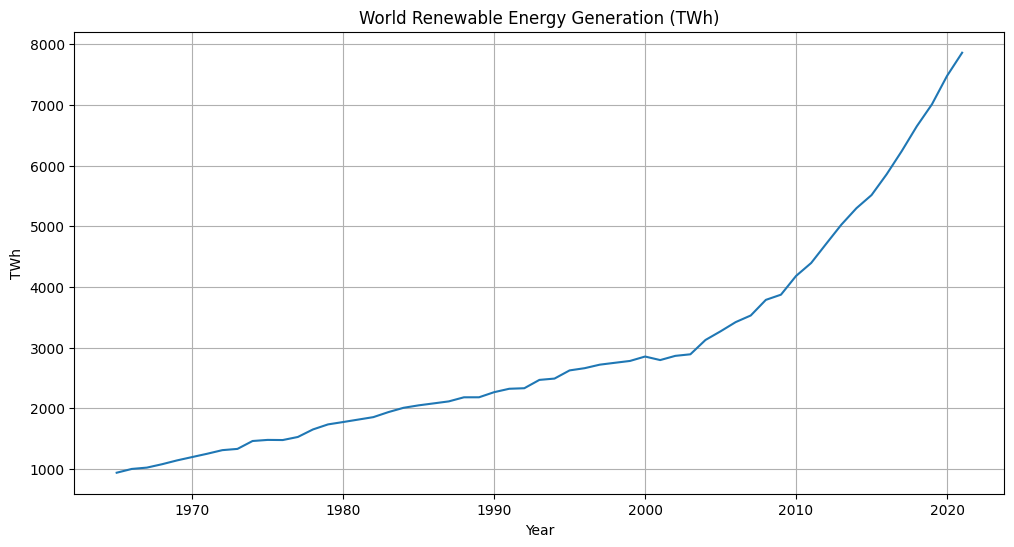

In [ ]:
#Jackson Darby
#This code outputs the total terawatts of energy generated from nuclear power plants across the world since 1965
#Import data management library
import pandas as pd
#Import plot library
import matplotlib.pyplot as plt
#Read the file using pandas
df = pd.DataFrame(worksheet.get_all_records())
#Get all the continents TWh
countries = ["North America", "Asia", "Europe", "South America", "Africa", "Oceania"]
#Get all the categories of renewables
renewables_catagories = [
        "Electricity from wind (TWh)",
        "Electricity from hydro (TWh)",
        "Electricity from solar (TWh)",
        "Other renewables including bioenergy (TWh)"
    ]
#Sort out all the empty cells so it does not give an error when using .sum() in the future
for col in renewables_catagories:
  df[col] = pd.to_numeric(df[col], errors='coerce')

#Get the TWh data only if it is one of the 7 continents above
country_yearly = (
    df[df["Entity"].isin(countries)]
    .groupby(["Year"])[renewables_catagories]
    # Add every continents different kind of renewables in terms of TWh
    .sum()
)
#Adds a new column that sums all the renewable categories for each year
country_yearly["Total Renewable Generation (TWh)"] = country_yearly.sum(axis=1)
#Size the graph 12 by 6
plt.figure(figsize=(12,6))
#Plot the total renewable energy generation over time
plt.plot(country_yearly.index, country_yearly["Total Renewable Generation (TWh)"])
#Create title
plt.title("World Renewable Energy Generation (TWh)")
#Create x-axis label
plt.xlabel("Year")
#Create y-axis label
plt.ylabel("TWh")
#Add the grid to better see where the points on the line are
plt.grid(True)
#Fianlly show the graph
plt.show()

##Overall anaylsis of nuclear and renewables

As seen in the graphs above both nuclear and renewable power makes large amounts of energy. According to the graphs and the global energy think tank [Ember](https://ember-energy.org/latest-insights/global-electricity-review-2025), clean energy (including nuclear and renewables) makes about 12,609 TWh per year. This is big step in replacing fossil fuels; however, fossil fuels still far outweighs the power generation of nuclear and renewables. Although, Oil itself makes a small part of the total energy generation world wide. Therefore, since Oil already makes a relatively small part of energy production it should be replaced by nuclear and renewables. This leaves Oil for other uses such as gasoline and plastic production.

#Conclusion

The purpose of our data is to advocate for this shift in energy sources. Our reliance on oil is unsustainable in the long term. As consumption continues to grow while reserves remain a finite resource, it's critical to invest in renewable and other energy sources such as solar, wind, hydro, etc. to create a diverse energy "portfolio." Starting a transition toward these other sources will allow us to reduce dependency on finite resources which will help ensure long-term stability!

# Trello Board Link


[https://trello.com/invite/b/68ecf94ab76a55839b6fc93c/ATTI39c885c8470dac7f65874edc14293efaA034C614/engr-1110-project](https://trello.com/invite/b/68ecf94ab76a55839b6fc93c/ATTI39c885c8470dac7f65874edc14293efaA034C614/engr-1110-project)